# Judging Books By Their Cover Part 2: EDA  

Welcome to Part-2 of the project, "Judging Books By Their Cover". In this notebook, we will dive deep into the data to find some interesting patterns and insights. 


But before that, let's ask an important question: **Why is EDA necessary?**<br>
There are a couple of  important reasons :
* **Garbage In Garbage Out**: This is the most important reason as to why we should perform EDA. It allows us to understand our data at a deeper level and assess it's quality. Garbage data in will only give garbage data out.
* **Beware of Bias:** Some form of bias can be present in the dataset. Bias can be present due to various reasons and sometimes it does have much significance. But, sometimes it can trickle down in the model and lead to unwanted consequences when applied in the real world.  
* **Always plot your data:** In a podcast with co-founder of W&B, Lukas Biewald, Rachel Tatman mentioned that the most underrated aspect of machine learning is data visualization. Sometimes overarching measures such as R-square, variance and standard deviation can be misleading. It is always better to visualize your data to see what it represents.
* **Communication is key:** Throughout the various phases of a deep learning/ machine learning/ data science project, communication is essential to move forward. EDA gives us a way to articulate our findings and share them in an effective manner.  

Check out [this talk](https://www.youtube.com/watch?v=kI4yxAL2wtM) by Martin Henze where he explains the importance of EDA and Data visualization.

Okay!!! Let's get started.




##Setup

Mounting Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


*Where is the dataset?*

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle/GenreClassification" 
%cd /content/gdrive/My Drive/kaggle/GenreClassification

/content/gdrive/My Drive/kaggle/GenreClassification


*What's in the directory?*

In [ ]:
!ls

book_data.csv			     sf_cyberpunk.csv
dls_lm.pickle			     sf_dystopia.csv
kaggle.json			     sf_hard.csv
models				     sf_military.csv
science-fiction-books-subgenres.zip  sf_robots.csv
sf_aliens.csv			     sf_space_opera.csv
sf_alternate_history.csv	     sf_steampunk.csv
sf_alternate_universe.csv	     sf_time_travel.csv
sf_apocalyptic.csv		     Wordcloud.png


Let's install the updated version of FastAI

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 186 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 


## Diving deep into the data

Loading the dataset

In [ ]:
import pandas as pd
book_data= pd.read_csv('book_data.csv')
book_data.drop_duplicates(subset=['Book_Title'],inplace=True)
book_data.head(5)

Unnamed: 0  ...                                                url
0       11920  ...   https://www.goodreads.com/book/show/32827036-ink
1        1494  ...  https://www.goodreads.com/book/show/429563.Lun...
2        8104  ...  https://www.goodreads.com/book/show/20881158-m...
3        4841  ...     https://www.goodreads.com/book/show/83763.Prey
4        5271  ...  https://www.goodreads.com/book/show/60293.Batt...

[5 rows x 12 columns]

*What kind of information is present in the dataset?*

In [ ]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10706 entries, 0 to 14972
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10706 non-null  int64  
 1   Book_Title           10706 non-null  object 
 2   Original_Book_Title  10706 non-null  object 
 3   Author_Name          10706 non-null  object 
 4   Edition_Language     10681 non-null  object 
 5   Rating_score         10706 non-null  float64
 6   Rating_votes         10706 non-null  int64  
 7   Review_number        10706 non-null  int64  
 8   Book_Description     10638 non-null  object 
 9   Year_published       10706 non-null  int64  
 10  Genres               10706 non-null  object 
 11  url                  10706 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.1+ MB


### Question: How many instances of each genre are present in the dataset?

To build a multi-label classifier, we need to know how many labels/genres are present in the dataset

In [ ]:
import ast
labels=list() #list of genres
dict_genre={} #dictionary of genres for a row in the dataset
for i in book_data.iterrows():
    dict_genre= ast.literal_eval(i[1]['Genres']) 
    labels.extend(list(dict_genre.keys())) 
print(f"We have {len(set(labels))} labels") #set() removes all the duplicate elements from the list of labels 

We have 521 labels


In total, there are 524 labels/genres present in the dataset. But, each genre does not have the same number of instances. Some genres are mentioned more times than others.

We need to count how many times each label is mentioned.

In [ ]:
counts = {} #dictionary which counts how many times each label was mentioned
for n in labels:
    counts[n] = counts.get(n, 0) + 1

Let's put these counts in a dataframe and sort it in a descending order

In [ ]:
genres=pd.DataFrame({"Genre":counts.keys(),"Count":counts.values()})
sorted_genres=genres.sort_values(by='Count',ascending=False)

Now we can see which genres are mentioned the most number of times

In [ ]:
sorted_genres.head(10)

Genre  Count
3                       Fiction   8565
5               Science Fiction   8439
0                       Fantasy   7633
16      Science Fiction Fantasy   3479
43                      Romance   3430
28                    Adventure   2667
1                   Young Adult   2614
2   Science Fiction (Dystopia)    2488
6                     Audiobook   2402
44        Fantasy (Paranormal)    2223

Science Fiction, Fiction, Fantasy are mentioned in most of the rows in the dataset (around 70-80%). This means that if we randomly assign these labels to books, we would be right 70-80% of the time. Moreover, the dataset also has sub-genres for genres like Sci-Fi, Fantasy, etc.

Considering this, it is better to remove these three labels (Sci-fi, Fiction, Fantasy) from the set of labels/genres. This will ensure the creation of a model that is accurate and specific (instead of predicting Sci-fi, it will predict Sci-Fi(Dystopia) or Sci-Fi(Cyberpunk),etc ).

### Questions: How old are these books and which language are they written in?

*How old are these books?*


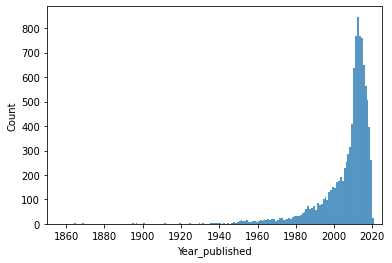

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots() 
sns.histplot(book_data,x=book_data.Year_published,ax=ax) #histogram 
ax.set_xlim(1850,2025) #range for the x-axis 
plt.show()

*Which language are they written in?*

In [ ]:
import plotly.graph_objects as go
from collections import Counter
language_count=Counter(list(book_data.Edition_Language)) 
fig = go.Figure(data=[go.Pie(labels=list(language_count.keys()), values=list(language_count.values()))])
fig.show()

Let's look at this information using a `DataFrame`

In [ ]:
pd.DataFrame({"Language":language_count.keys(),"Count":language_count.values()})

Language  Count
0    English   9880
1       None    683
2     German     35
3   Japanese     18
4     French     22
5        NaN     25
6      Dutch      2
7    Finnish      2
8    Spanish      6
9     Polish     11
10   Russian      9
11   Bengali      4
12   Italian      2
13   Chinese      5
14    Arabic      1
15   Swedish      1

Most of the books in the dataset were published during *2000-2020* time period and are written in the English language.

### Question: Which are the best books?

This is a particularly hard question to answer. What defines a good book? More so, what do you mean by the best books?

While all these questions are entirely legitimate, here, we will limit ourselves to seeking a quantitative measure based on the votes and the scores provided for each book. 

First, we will see which books have the most votes. The column `Rating_votes` represents the number of people that have rated a particular book.  

In [ ]:
sorted_books=book_data.sort_values(by="Rating_votes",ascending=False)
sorted_books[['Book_Title','Rating_votes','Rating_score']].head(10)

Book_Title  Rating_votes  Rating_score
6059      Harry Potter and the Sorcerer's Stone       7336299          4.48
2349                           The Hunger Games       6572148          4.33
4122                                       1984       3276673          4.19
903                                   Divergent       3007473          4.19
9517        The Hobbit, or There and Back Again       2990501          4.28
12907  Harry Potter and the Prisoner of Azkaban       2928571          4.57
2370       Harry Potter and the Deathly Hallows       2902272          4.62
2051                                Animal Farm       2844459          3.95
9367    Harry Potter and the Chamber of Secrets       2838607          4.43
4528                            Angels & Demons       2743156          3.91

*Which books have the least number of votes?*

In [ ]:
sorted_books[['Book_Title','Rating_votes','Rating_score']].tail(10)

Book_Title  Rating_votes  Rating_score
10182                     Engineward #4             2           3.5
10105                AGF: The Gathering             2           2.5
7093                    Stranded Angels             1           4.0
520    Brynin the War 2 (Brynin War, #2             1           5.0
795                   Arttu ja ihmemies             1           4.0
8603                                 泡泡             1           2.0
3211                      Engineward #6             1           4.0
11813               This Shoal of Space             0           0.0
2069           We Have Always Been Here             0           0.0
10548               Ways to Spaceflight             0           0.0

We can also see which books have the highest scores (`Rating_score`)

In [ ]:
sorted_books=book_data.sort_values(by="Rating_score",ascending=False)
sorted_books[['Book_Title','Rating_score','Rating_votes']].head(10)

Book_Title  ...  Rating_votes
1464                          The Complete Alpha Dreamer  ...             4
1180                                          Overgeared  ...             2
6006               Tibar and the Mysteries of Surplicity  ...             2
520                     Brynin the War 2 (Brynin War, #2  ...             1
7664                   The Unofficial Master Annual 2074  ...             5
9152                                    Come In, Collins  ...            15
3134                                     Dead Men Flying  ...            12
9815   Donavan: From Michael Bunker's World of "PENNS...  ...            76
13008                                    The Bullybuster  ...             9
8448                                   Words of Radiance  ...        220750

[10 rows x 3 columns]

Let's see the books which have the lowest ratings. 

In [ ]:
sorted_books[['Book_Title','Rating_score','Rating_votes']].tail(10)

Book_Title  Rating_score  Rating_votes
12537                 Die Anfänger          2.71            21
3998   Robot Burp Head Smartypants          2.71           117
2970             The Iron Assassin          2.68           222
14947                  The Tourist          2.63           915
14760                Skull Flowers          2.50           113
10105           AGF: The Gathering          2.50             2
8603                            泡泡          2.00             1
10548          Ways to Spaceflight          0.00             0
2069      We Have Always Been Here          0.00             0
11813          This Shoal of Space          0.00             0

Sorting books based on their rating scores does not make sense. Notice that the books with the highest rating scores have been reviewed by very less people. This indicates that as more people review a book, it's rating score declines.

We need to find books which have a high rating score as well as a high number of votes. 


In [ ]:
top_500_voted=book_data.sort_values(by="Rating_votes",ascending=False).head(500) #top 500 most reviewed books
best_books=top_500_voted.sort_values(by="Rating_score",ascending=False).head(20) #sorting books according to rating score
best_books[['Book_Title','Rating_score','Rating_votes']] #top 20 books

Book_Title  Rating_score  Rating_votes
8448                           Words of Radiance          4.74        220750
10312                           The Way of Kings          4.62        323258
2370        Harry Potter and the Deathly Hallows          4.62       2902272
2372                    A Court of Mist and Fury          4.61        374766
12907   Harry Potter and the Prisoner of Azkaban          4.57       2928571
258                              Crooked Kingdom          4.57        221063
8174      Harry Potter and the Half-Blood Prince          4.57       2524123
9285                              Kingdom of Ash          4.56        151815
6393                          Clockwork Princess          4.56        355268
8577         Harry Potter and the Goblet of Fire          4.56       2691854
1961                            Queen of Shadows          4.54        264172
9624                      The Return of the King          4.53        699488
8742                           A Storm of Swords          4.53        679450
9102             Written in My Own Heart's Blood          4.53         97445
13406                           Empire of Storms          4.53        214483
1271                                Saga, Vol. 2          4.52         93038
11953                       The Name of the Wind          4.52        744227
9876   Harry Potter and the Order of the Phoenix          4.50       2599567
3812                       The Lord of the Rings          4.50        581951
2036                           The Last Olympian          4.50        698261

From above, we can see that several parts of the Harry Potter Series are present in the list of top 20 books. Now, this makes much more sense. We also have books like *The Lord of the Rings, The Last Olympian, The Way of Kings* in the list.

### Question: Which are the best authors?

Like the previous question, there can be many possible answers for this question also.  However, we will limit ourselves to using the quantitative measures of `Rating_votes` and `Rating_score`. 

*How many authors are mentioned in the dataset?*

In [ ]:
len(book_data.Author_Name.unique())

3882

*Which authors have written the most number of books?*

In [ ]:
from collections import Counter
authors_count=Counter(list(book_data.Author_Name)) # dictionary of authors and the number of books written by them 
authors=pd.DataFrame({"Authors":authors_count.keys(),"Count":authors_count.values()})
sorted_authors=authors.sort_values(by='Count',ascending=False)
sorted_authors.head(10)

Authors  Count
225  Harry Turtledove     76
100       David Weber     72
265        Ruby Dixon     62
171        Eric Flint     56
144   Lindsay Buroker     48
54     Robert Kirkman     47
387    K.A. Applegate     45
70      S.M. Stirling     41
120    Stephen Baxter     39
135       John Scalzi     39

We can look at authors with the highest average rating scores 

In [ ]:
mean_ratings=book_data.groupby('Author_Name').Rating_score.mean()
sorted_ratings=mean_ratings.sort_values(ascending=False)
sorted_ratings.head(10)

Author_Name
Alister Pearson     5.0000
Park Saenal         5.0000
Chris Harte         5.0000
Thadd Evans         5.0000
D.K. Cassidy        4.8200
Clay Cormany        4.7800
Mary Safro          4.7100
Bill  Patterson     4.6825
Mò Xiāng Tóngxiù    4.6800
Cryoclaire          4.6300
Name: Rating_score, dtype: float64

We can also look at the authors with the lowest average rating scores

In [ ]:
sorted_ratings.tail(10)

Author_Name
Harun Šiljak           2.73
Ivan Nedič             2.71
Ed Greenwood           2.68
Robert Dickinson       2.63
Jazon Dion Fletcher    2.50
Sam White              2.50
Wang Jinkang           2.00
Hermann Oberth         0.00
Lena  Nguyen           0.00
John Argo              0.00
Name: Rating_score, dtype: float64

It's probably a good idea to look at authors with the highest number of votes 

In [ ]:
mean_votes=book_data.groupby('Author_Name').Rating_votes.mean()
sorted_votes=mean_votes.sort_values(ascending=False)
sorted_votes.head(10)

Author_Name
J.K. Rowling                2.993754e+06
William Golding             2.325590e+06
Suzanne Collins             2.315206e+06
George Orwell               2.096518e+06
Audrey Niffenegger          1.604679e+06
Dan Brown                   1.444980e+06
Antoine de Saint-Exupéry    1.437278e+06
Stieg Larsson               1.388318e+06
J.R.R. Tolkien              1.275534e+06
Bram Stoker                 9.713740e+05
Name: Rating_votes, dtype: float64

*Also, which are the authors with the lowest number of votes?*

In [ ]:
sorted_votes.tail(10)

Author_Name
Max Valier              2.0
Harold Tietjens         2.0
Jeno Marz               2.0
Wang Jinkang            1.0
Didier Lévy             1.0
Thadd Evans             1.0
Ralph Joseph-MIriani    1.0
John Argo               0.0
Hermann Oberth          0.0
Lena  Nguyen            0.0
Name: Rating_votes, dtype: float64

Answering this question solely on the basis of `Rating_score` or `Rating_votes` does not make sense. There can be authors which have a high rating score but have been reviewed by a small number of people. Or, there can also be authors which have a high number of votes but don't have the best track record.

Similar to the approach in the previous question, here, we will first sort authors on the basis of their average votes and then take the top 500 most voted authors and sort them according to their average rating scores. 

In [ ]:
top_500=sorted_votes.head(500)
cond= book_data['Author_Name'].isin(list(top_500.index))
most_votes_authors=book_data[cond]
best_authors=most_votes_authors.groupby('Author_Name').Rating_score.mean()
best_authors.sort_values(ascending=False).head(20)

Author_Name
Hiromu Arakawa            4.598077
Patrick Rothfuss          4.520000
ONE                       4.500000
J.K. Rowling              4.493750
Hajime Isayama            4.480833
Chris Colfer              4.480000
Kaiu Shirai               4.470000
Derek Landy               4.455000
T.J. Klune                4.430000
Patricia Briggs           4.392500
Colleen Houck             4.390000
Casey McQuiston           4.375000
Jennifer L. Armentrout    4.372143
Yana Toboso               4.370000
Rick Riordan              4.368889
Pierce Brown              4.364000
Sarah J. Maas             4.361176
Cassandra Clare           4.349375
Christelle Dabos          4.346667
J.R.R. Tolkien            4.341667
Name: Rating_score, dtype: float64

This list makes much more sense. The list contains influential authors like J.K. Rowling, J.R.R. Tolkien, and Rick Riordan, among others. Another interesting observation is that Japanese manga artists like Hiromu Arakawa and Hajime Isayama topped the list. It shows the rapidly increasing interest in Japanese mangas and the high quality of work produced in this industry.   

### Word Clouds for different genres 

Word Clouds are a visual representation of textual data, typically used to depict keyword metadata (tags) on websites or to visualize free-form text. Using word clouds, we can visualize and gauge the importance of different words in a text. It can also help us spot important differences or similarities in a collection of texts. 

In this section, we will create word clouds for some major genres that appear in our dataset. 

In [ ]:
#impoting essential libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Let's create a word cloud for the whole dataset

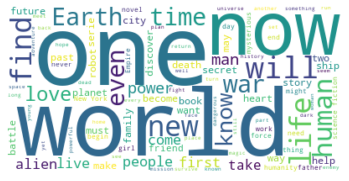

In [ ]:
text= " ".join(review for review in book_data.Book_Description if type(review)==str) #joining texts in the dataset
stopwords=set(STOPWORDS) #removing  stopwords

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=100,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some of the most important words from the above word cloud are: world, one, now, will, find, Earth, time, life. 

Words like one, now, will do not give us any unique information about the text. So, it is better to remove them in order for other essential words to be incorporated in the word cloud.

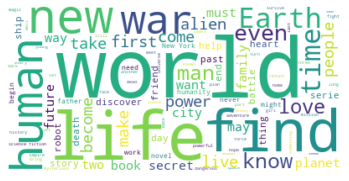

In [ ]:
stopwords.update(['one','will','now']) #adding these words to the stopwords list

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords,max_words=100,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now that we know how to create word clouds, we can create word clouds for specific genres. 

First, we need to get the labels for each row in the dataset. For each book in the dataset, multiple labels have been assigned by the voters. Some of these labels have many votes, while others have a small number of votes. Labels with a small number of votes can be misleading since there is not enough consensus about them. Considering this, we should only incorporate labels that have the majority of votes and make up most of the distribution. 

Here, we will take the labels which make 90% of the distribution of the votes and disregard the rest.

In [ ]:
def get_labels(string):
    #getting labels in dictionary format 
    d=ast.literal_eval(string)
    s=sum(d.values())
    genre_pct=[(i,(d[i]/s)*100) for i in d] #calculating the proportion of votes each label got
    genre_pct.sort(key=lambda y: y[1],reverse=True) #sorting in descending order
    add=0
    labels=[]
    for i in genre_pct:
      if add<=90: #taking 90% 
        labels.append(i[0])
        add+=i[1]
    return labels

Let's get the labels

In [ ]:
book_data['labels']=list(map(get_labels,book_data['Genres']))

For each genre, we need to combine all the textual data belonging to that genre.

In [ ]:
def textgenre(genre):
  return " ".join(data[-1][-5] for data in book_data.iterrows() if type(data[-1][-5])==str and genre in data[-1][-1])

Let's create word clouds for the following six genres:

*   Science Fiction
*   Historical
* Romance
* Adventure
* Young Adult
*  Space




In [ ]:
genres=['Science Fiction','Historical','Romance','Adventure','Young Adult','Space'] #list of genres
genre_text={} #dictionary containing text for each genre
for i in genres:
  genre_text[i]=textgenre(i)  

Finally let's plot these word clouds

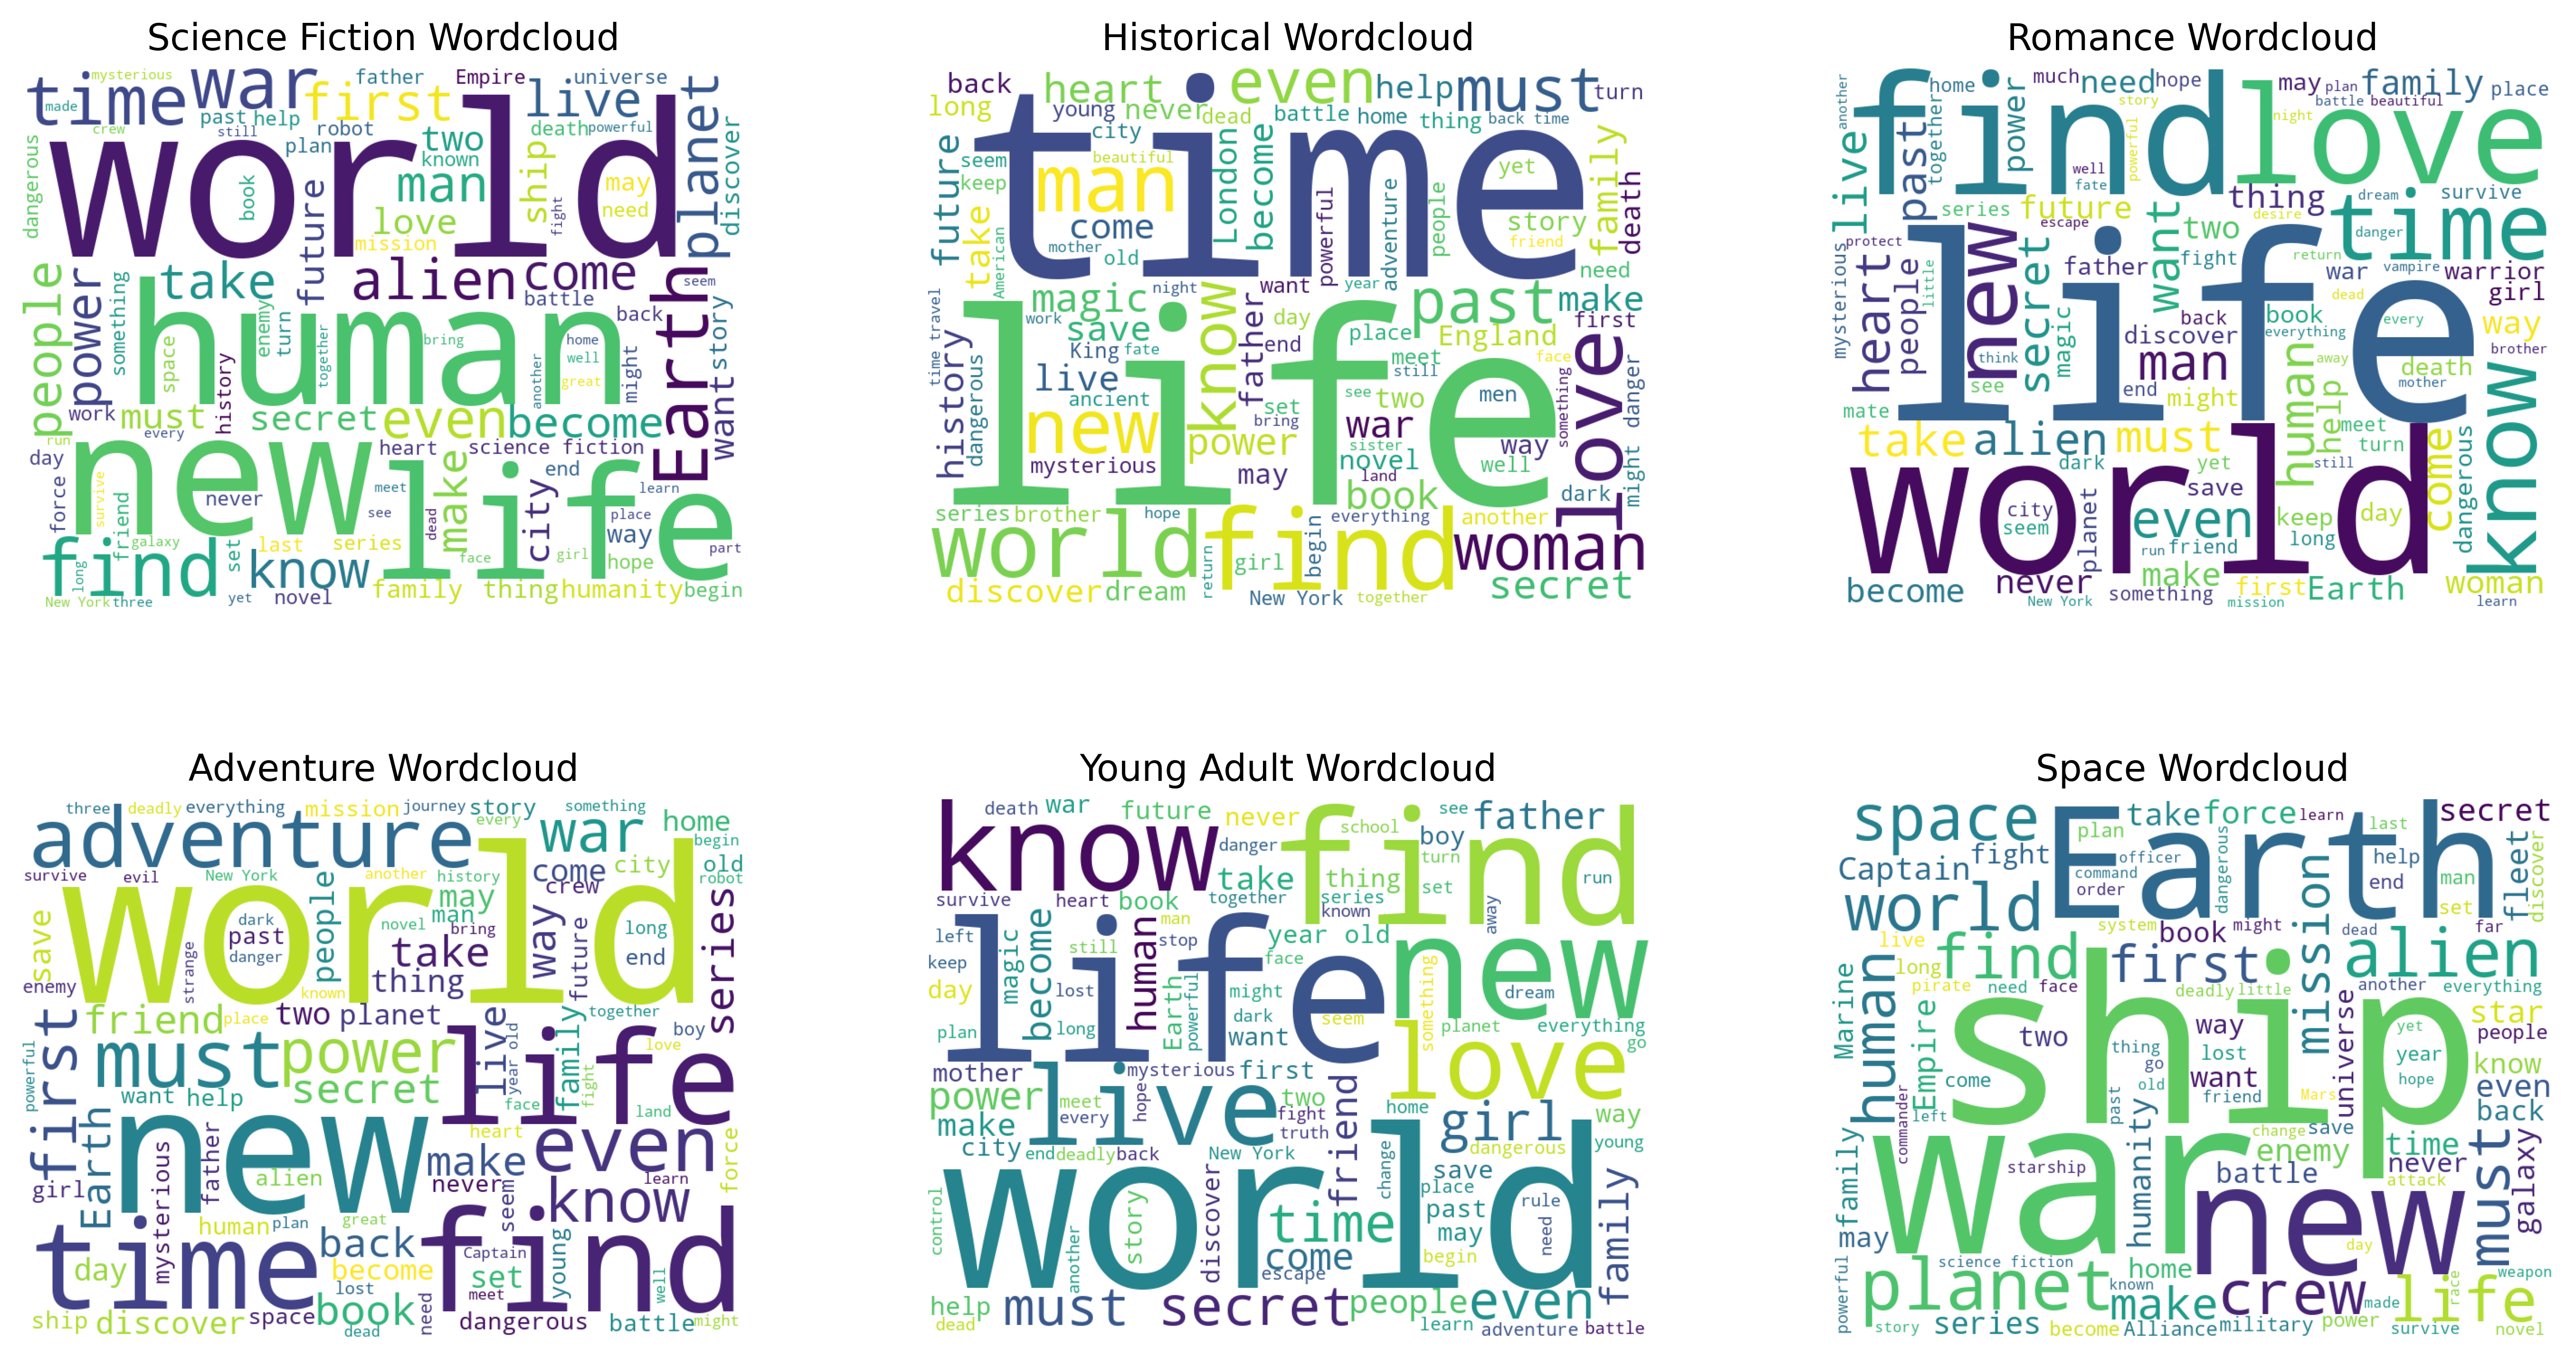

In [ ]:
fig=plt.figure(dpi=400)
fig.set_size_inches(15,8)
fig.subplots_adjust(hspace=0.25,wspace=0.25)
for i in range(6):
  ax=fig.add_subplot(2,3,i+1)
  wordcloud=WordCloud(stopwords=stopwords,max_words=100,background_color='white',width=800,height=600).generate(genre_text[genres[i]])
  ax.imshow(wordcloud)
  ax.set_title(f"{genres[i]} Wordcloud")
  ax.axis('off')
fig.savefig("Wordcloud.png",dpi=300)

## Conclusion

In this notebook, we dived deep into the data and tried to answer some important questions:
* How many instances of each genre are present in the dataset?
* How old are these books and which language are they written in?
* Which are the best books?
* Which are the best authors?

We also created word clouds to visualize the textual data in our dataset.

 In the next notebook, we will create our multi-label genre classifier. 
